# DS 3000 Quiz 1

Due: Monday May 20 in-class

Time Limit: You have 2 hours to complete the assignment (this includes the handwritten and coding parts together)

## Coding Part

This is the second part of Quiz 1, worth 50 points; the first part is Handwritten (worth 50 points).

- There is **no collaboration allowed** on this assignment; it serves as an individual assessment. Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](http://www.northeastern.edu/osccr/academic-integrity)

### Submission Instructions
Submit this `ipynb` file to Gradescope (this can also be done via the assignment on Canvas).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the `ipynb` file to Gradescope. The handwritten part will be submitted by hand; you do not need to upload it.

In [1]:
# the following modules may be necessary to complete the quiz
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import plotly.express as px

## Summarizing Data Numerically

### Part 1: Ideation Using Data (10 points)

On Canvas is the `'GDP_Energy_WBdat.csv'` data set. Read it in using `pandas` then print the `.head()`. The data set contains the GDP (\\$ per capita), Total Fossil Fuel Energy Consumption (as a \% of total energy), CO$^2$ emissions (kt), and Urban Population of the current 27 European Union member states from 1990 to 2015 (with a few years/countries missing).

After you read in the data, in a markdown cell, discuss which features you think (intuitively) would be related to each other, and what trends you might expect to see over time. Come up with **at least 1** question you think would be interesting to answer with these data and describe why you think it is interesting.

In [3]:
url = 'GDP_Energy_WBdat.csv'
gdp = pd.read_csv(url, encoding='unicode_escape')
gdp.head()

,country,date,GDP,Fossil_Fuels,CO2_emit,Urban_pop
0,Austria,1990,21680.989623,79.132345,58275.7,4833974.0
1,Austria,1991,22410.911767,79.127007,62423.2,4861464.0
2,Austria,1992,24880.164118,77.237211,57668.0,4893935.0
3,Austria,1993,24081.527793,77.011142,57804.0,4912877.0
4,Austria,1994,25646.700659,77.585708,58288.2,4910076.0


Some features that I think would be related to each other are that the greater a countries GDP is, the greater its fossil fuels and CO2 emitted would be. I also think this would apply for urban population, so for countries with a greater urban population, their fossil fuels and CO2 emitted would also be higher. I think over time the GDP, urban population, fossil fuels and co2 emitted will all increase as countries in Europe become more developed. One question that I think would be interesting to answer is whether or not European countries are emitting more CO2 today than in the past and how CO2 emissions in general have changed in Europe. This question is interesting because Europe is a leading sector of the world and its CO2 emissions set a precedent for the rest of the world to follow, so I want to know how general CO2 emissions have changed over time and whether or not Europe has found ways to limit its carbon emissions.

### Part 2: Manipulating Data (10 points)

Create a new column for the data called `'CO2_Upop'` which is the ratio of CO$^2$ emissions to Urban population. Print the `.head()` to make sure it worked. Then discuss in one or two sentences, in a markdown cell, why we may want to do this.

**Hint:** you may help your intuition by looking at the correlation matrix in **Part 3** and thinking critically about the data being collected.

In [4]:
gdp['CO2_Upop'] = gdp['CO2_emit'] / gdp['Urban_pop']
gdp.head()

,country,date,GDP,Fossil_Fuels,CO2_emit,Urban_pop,CO2_Upop
0,Austria,1990,21680.989623,79.132345,58275.7,4833974.0,0.012055
1,Austria,1991,22410.911767,79.127007,62423.2,4861464.0,0.012840
2,Austria,1992,24880.164118,77.237211,57668.0,4893935.0,0.011784
3,Austria,1993,24081.527793,77.011142,57804.0,4912877.0,0.011766
4,Austria,1994,25646.700659,77.585708,58288.2,4910076.0,0.011871


**We would want to collect the ratio of CO2 emissions to Urban population because countries with a larger population will naturally have higher CO2 emissions because they need to support more people, will need more infrastructure, and are more developed. By collecting the ratio, we are calculating the rate of CO2 emissions per urban person which is a much more standardized way of comparing emissions of countries.**

### Part 3: EDA (20 points)

Use the `.describe()` and `.corr()` functions to find the mean, median, standard deviation, and correlation matrix for the **numeric features, not including date**.

Then, use the `px.scatter()` function to make a scatter plot of `CO2_Upop` (on the $x$-axis) and `GDP` (on the $y$-axis), with `color='country'`.

In [24]:
gdp.iloc[:,2:7].describe()

,GDP,Fossil_Fuels,CO2_emit,Urban_pop,CO2_Upop
count,665.000000,665.000000,665.000000,6.650000e+02,665.000000
mean,23739.222110,76.340941,129109.666301,1.199309e+07,0.011528
std,19105.749817,18.134726,181266.608452,1.577776e+07,0.004700
min,1102.103785,13.056215,2169.100000,3.090960e+05,0.004300
25%,10273.451812,70.028439,20276.700000,2.345367e+06,0.008153
50%,20664.552270,79.847800,56970.300000,5.671407e+06,0.011004
75%,31822.803848,90.087964,124716.700000,1.129733e+07,0.013843
max,123678.702143,100.000000,955307.700000,6.306206e+07,0.037434


In [17]:
gdp.iloc[:,2:7].corr()

,GDP,Fossil_Fuels,CO2_emit,Urban_pop,CO2_Upop
GDP,1.000000,-0.052819,0.076103,0.094145,0.339518
Fossil_Fuels,-0.052819,1.000000,0.144498,0.046085,0.157548
CO2_emit,0.076103,0.144498,1.000000,0.950714,0.007623
Urban_pop,0.094145,0.046085,0.950714,1.000000,-0.123480
CO2_Upop,0.339518,0.157548,0.007623,-0.123480,1.000000


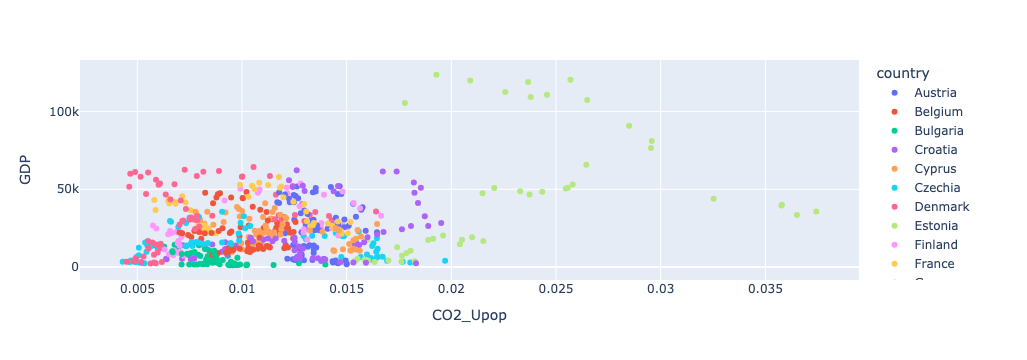

In [18]:
px.scatter(gdp, x='CO2_Upop', y='GDP', color='country')

### Part 4: Interpreting Statistics (10 points)

Based on the EDA from Part 3, answer each of the following questions with a (sufficiently detailed) bullet point:

- Belgium's GDP in 2015 reached \\$41008.30 per capita, 75.87\% of their energy came from fossil fuels, and they had .0086 CO$^2$ emissions per urban population; how does Belgium compare to the average values of these features over the timeframe of the data set? What conclusions might you draw about Belgium based on this?
- Given the correlation between `CO2_Upop` and `GDP`, and nothing else, would you say these two features are related? Then, when considering the plot of `CO2_Upop` versus `GDP`, does your opinion change? What is one thing that is particularly interesting about the plot?

- Belgium has a relatively high GDP of $41008.30 compared to the average of this dataset ($23739). Belgium also has relatively low CO2 emissions per urban population of .0086 CO2 compared to the mean of the dataset (0.011528). Belgium has a relatively average 75.87% of their energy came from fossil fuels compared to the mean of 76.34%. This tells me that Belgium is a relatively wealthy country for Europe since its GDP is greater than the average European country and that it's more sustainable than the average European country since its CO2 emissions are lower. However, it relies on fossil fuels to a similar extent to other European countries. Overall, Belgium is a sustainable country, but it still has an average reliance on fossil fuels to produce is energy.
- Given the correlation of 0.339518 between CO2_Upop and GDP, I would say that these features are slightly correlated, however, the plot shows a much higher correlation with some outliers that are likely skewing the correlation to be lower. One thing that is particularly France, Denmark, and Sweden all have higher GDP's than their Co2 emissions per urban population would suggest since their CO2_Upop is relatively low